In [32]:
%matplotlib inline

import numpy as np
import math
from scipy.special import erf
import matplotlib.pyplot as plt

sigma_weight_profile = 20
Jpos_excit2excit = 1.6
N_excitatory = 2048
x_pre = 2048 / 2
x_post = np.arange(2048)

# precompute the weight profile for the recurrent population
tmp = math.sqrt(2. * math.pi) * sigma_weight_profile * erf(180. / math.sqrt(2.) / sigma_weight_profile) / 360.
Jneg_excit2excit = (1. - Jpos_excit2excit * tmp) / (1. - tmp)

presyn_weight_kernel = \
        [(Jneg_excit2excit +
          (Jpos_excit2excit - Jneg_excit2excit) *
          math.exp(-.5 * (360. * min(j, N_excitatory - j) / N_excitatory) ** 2 / sigma_weight_profile ** 2))
         for j in range(N_excitatory)]


Gain = Jpos_excit2excit
Gain = Jneg_excit2excit + (Jpos_excit2excit - Jneg_excit2excit)
presyn_weight_kernel_2 = Gain * np.exp( -(360.0 * np.minimum(np.abs(x_pre-x_post), N_excitatory - np.abs(x_pre-x_post)) / N_excitatory)**2 / (2 * sigma_weight_profile**2))


43.9453125

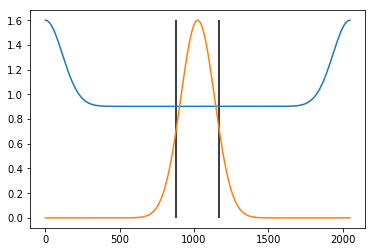

In [48]:
plt.plot(presyn_weight_kernel)
plt.plot(presyn_weight_kernel_2)
rr = 20
plt.vlines(900-rr, 0, 1.6)
plt.vlines(1150+rr, 0, 1.6)
(1150.-900.)/2048. * 360.

In [22]:
np.abs(x_pre-x_post).shape

(2048,)

In [26]:
np.minimum(abs(x_pre-x_post), N_excitatory - abs(x_pre-x_post)) 

array([1024, 1023, 1022, ..., 1021, 1022, 1023])

In [31]:
np.exp( -(360.0 * np.minimum(np.abs(x_pre-x_post), N_excitatory - np.abs(x_pre-x_post)) / N_excitatory)**2 / (2 * sigma_weight_profile**2))

array([2.57675711e-18, 2.78875320e-18, 3.01795758e-18, ...,
       3.26574772e-18, 3.01795758e-18, 2.78875320e-18])